## https://machinelearningmastery.com/time-series-data-stationary-python/

<Figure size 1440x1152 with 0 Axes>

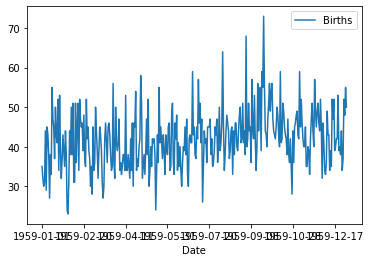

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0)
plt.figure(figsize=(20,16))
series.plot()
plt.show()


array([[<AxesSubplot:title={'center':'Births'}>]], dtype=object)

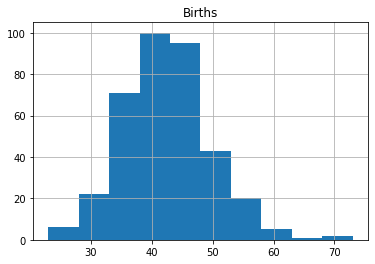

In [8]:
series.hist()

In [9]:
X = series.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


### mean1 =mean2 and std1 = std2 ----> stationary

In [17]:
df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df =  df.set_index(['Month'])

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

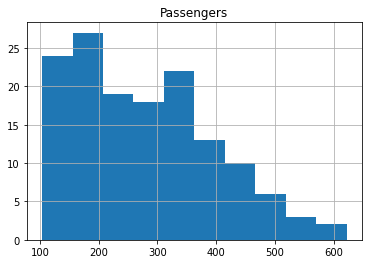

In [18]:
df.hist()

In [19]:
X22 = df.values
split = round(len(X22) / 2)
X1, X2 = X22[0:split], X22[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


### maen 1 and mean2 is diffreent , std1 and std2 is not same

<Figure size 1440x1152 with 0 Axes>

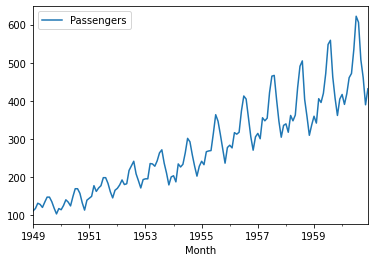

In [20]:
plt.figure(figsize=(20,16))
df.plot()
plt.show()

In [31]:
from numpy import log


In [29]:
C = df.values
C =log(C)

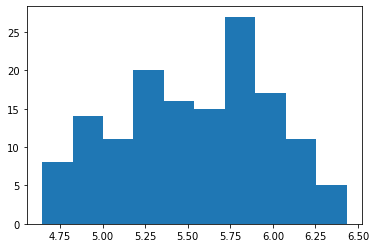

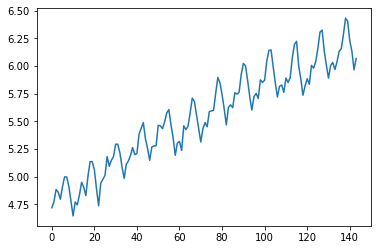

In [30]:
plt.hist(C)
plt.show()
plt.plot(C)
plt.show()

In [34]:
split = round(len(C) / 2)
X1, X2 = C[0:split], C[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=5.175146, mean2=5.909206
variance1=0.068375, variance2=0.049264


#### after taking log transform of df series , mean1,mean2 and std1 and std2 looks same but still the TS is not stationary .
#### So we go for ADF test  to chcek the stionarity

In [35]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


### p-value is less than 0.05 --- so TS is stationary

In [36]:
df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df =  df.set_index(['Month'])
X = df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


### p-value is greater than 0.05 then we can say that TS is not stationary

In [37]:
df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df =  df.set_index(['Month'])
X = df.values
X = log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


### p-value is greater than 0.05 then we can say that TS is not stationary

In [40]:
result

(-1.7170170891069625,
 0.4223667747703904,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)